In [1]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd 
import numpy as np 

In [2]:
rank_times =  [1090042, 641875, 335750, 149042, 156375, 193250, 173583]
select_times = [487916, 2023750, 2219417, 3133333, 3845583, 5181500, 6752792]
overheads = [448, 1024, 4672, 31936, 274016, 2549312, 22370624]
bitarray_size =  [10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [3]:
log_bitarray_size = np.log10(bitarray_size)

In [21]:
log_overhead_size = np.log10(overheads)

In [4]:
log_bitarray_size

array([1., 2., 3., 4., 5., 6., 7.])

In [5]:
rank_times_ms = []
select_times_ms = [] 

for elem in rank_times: 
    rank_times_ms.append(elem/1000000)
    
for elem in select_times: 
    select_times_ms.append(elem/1000000)

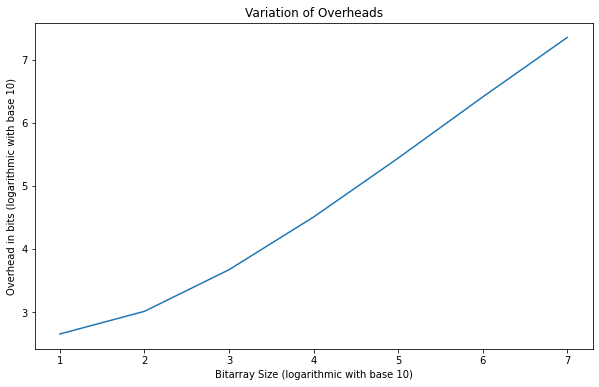

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(log_bitarray_size, log_overhead_size)
ax.set_title('Variation of Overheads')
ax.set_xlabel('Bitarray Size (logarithmic with base 10)')
ax.set_ylabel('Overhead in bits (logarithmic with base 10)')
#plt.legend()

plt.show()

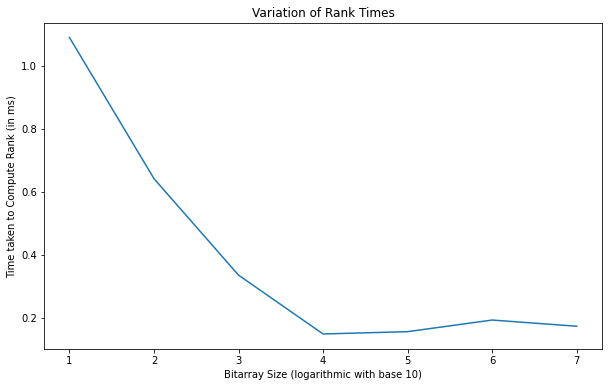

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(log_bitarray_size, rank_times_ms)
ax.set_title('Variation of Rank Times')
ax.set_xlabel('Bitarray Size (logarithmic with base 10)')
ax.set_ylabel('Time taken to Compute Rank (in ms)')
#plt.legend()

plt.show()

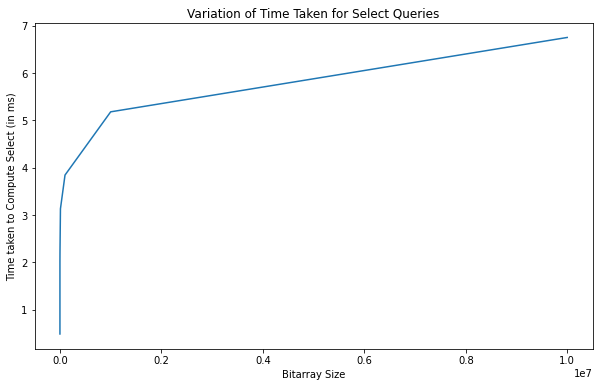

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(bitarray_size, select_times_ms)
ax.set_title('Variation of Time Taken for Select Queries')
ax.set_xlabel('Bitarray Size')
ax.set_ylabel('Time taken to Compute Select (in ms)')
#plt.legend()

plt.show()

In [ ]:
## Load outputs from outputs.txt

In [29]:
import pandas as pd

In [68]:
df2 = pd.read_csv("outputs.txt", 
                 names=["array_size", "sparsity", "sparseOverhead", "strOverhead", "numElemAt", "getIndexOf", "getAtRank", "Append", "Finalize"])

In [69]:
df2.head(20)

,array_size,sparsity,sparseOverhead,strOverhead,numElemAt,getIndexOf,getAtRank,Append,Finalize
0,100,0.01,1216,1712,1033708,2077000,383000,302291,1978459
1,100,0.05,1904,2160,325250,1237583,249167,7292,49875
2,100,0.10,2576,2592,297084,1242583,230625,11666,53000
3,100,0.50,8736,6736,173083,1404959,51625,20500,38792
4,1000,0.01,5888,16800,148125,1378000,44834,62250,152417
5,1000,0.05,13104,21712,152250,1708250,44458,42916,1591375
6,1000,0.10,18672,25456,147542,1773625,43250,61917,68250
7,1000,0.50,76848,64336,150750,2063459,43333,135166,96042
8,10000,0.01,46640,169680,148209,2205958,50042,231459,269208
9,10000,0.05,106176,209728,153917,2543541,48000,282042,321041


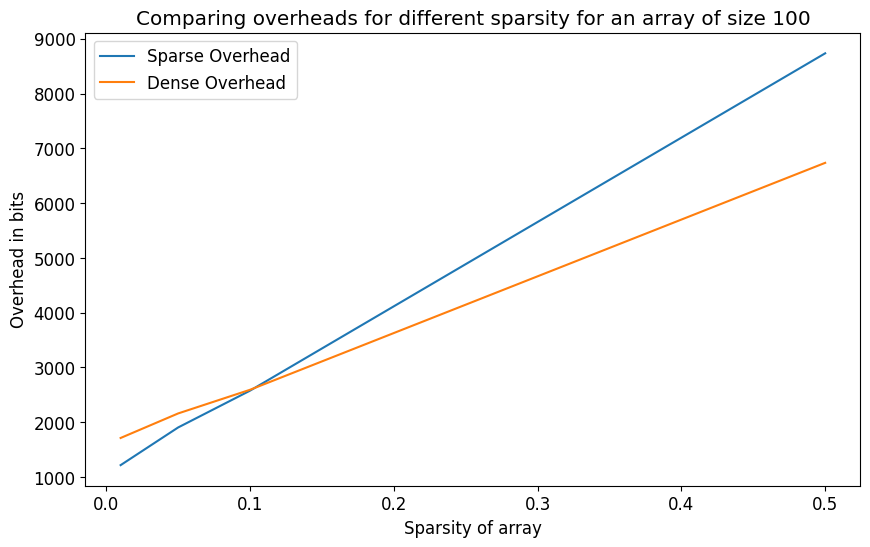

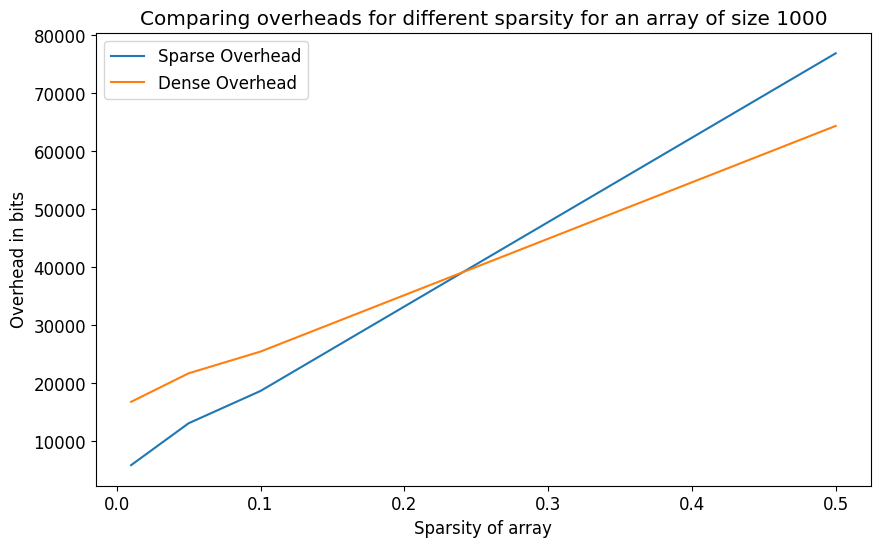

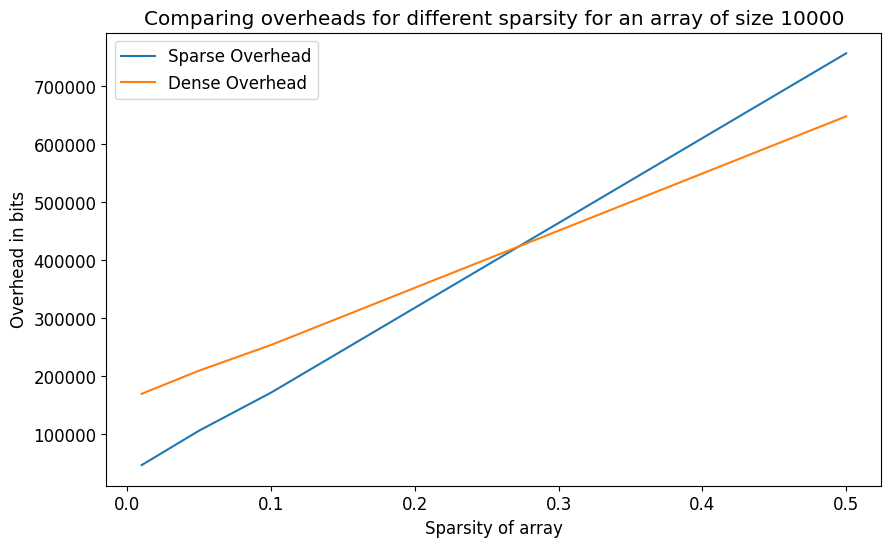

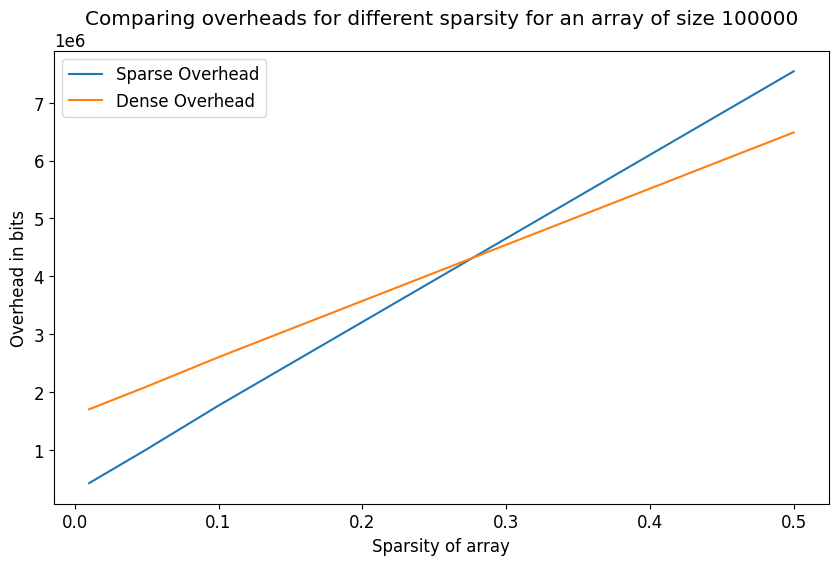

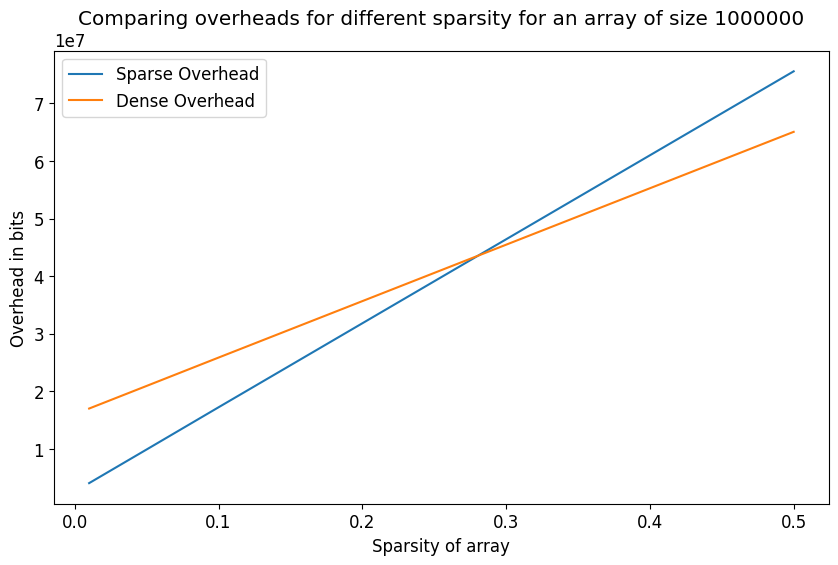

In [74]:
for array_size in [100, 1000, 10000, 100000, 1000000]: 
    df_temp = df2.loc[df.array_size == array_size]
    x = df_temp.sparsity.values
#     y1 = df_temp.numElemAt.values/1e6
#     y2 = df_temp.getIndexOf.values/1e6
#     y3 = df_temp.getAtRank.values/1e6
#     #y4 = df_temp.Append.values/1e6
#     y5 = df_temp.Finalize.values/1e6
    y6 = df_temp.sparseOverhead.values
    y7 = df_temp.strOverhead.values
    
    plt.figure(figsize=(10,6))
    
    
#     plt.plot(x, y1, label='num_elem_at() [calls rank1]')
#     plt.plot(x, y2, label='get_index_of() [calls select1]')
#     plt.plot(x, y3, label='getAtRank()')
#     #plt.plot(x, y4, label="append")
#     plt.plot(x, y5, label="finalize()")
    plt.plot(x, y6, label="Sparse Overhead")
    plt.plot(x, y7, label="Dense Overhead")

    # Add legend and axis labels
    plt.legend()
    plt.xlabel('Sparsity of array')
    plt.ylabel('Overhead in bits')
    plt.title(f"Comparing overheads for different sparsity for an array of size {array_size}")    
    # Show plot
    plt.show()

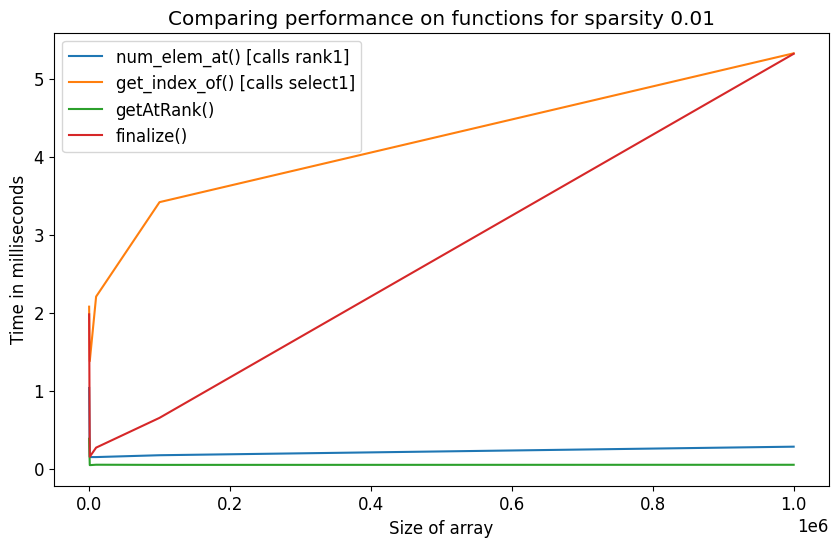

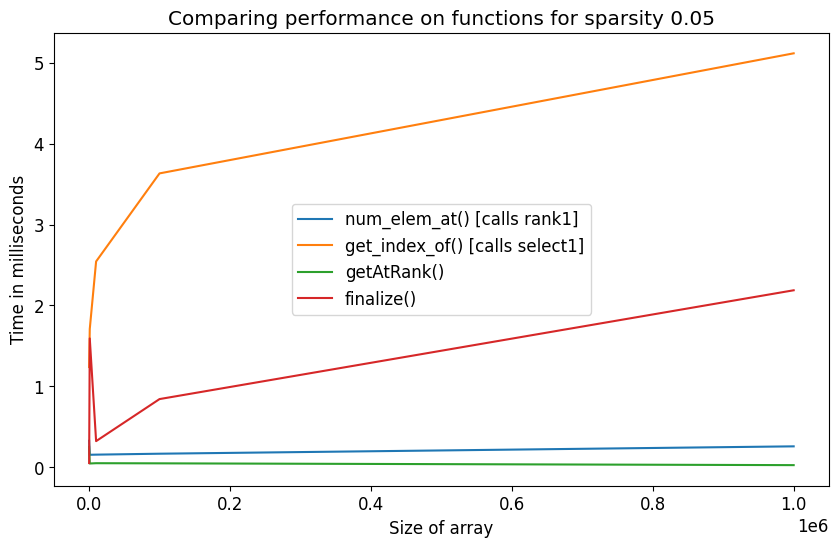

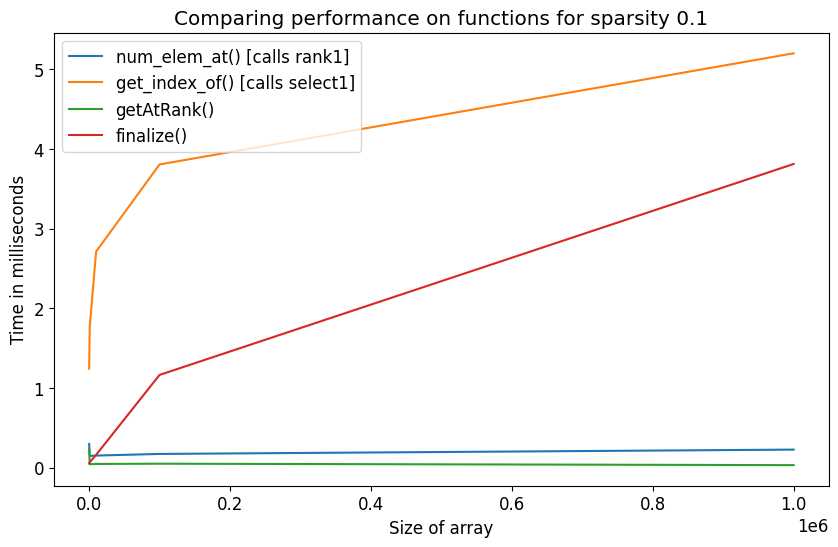

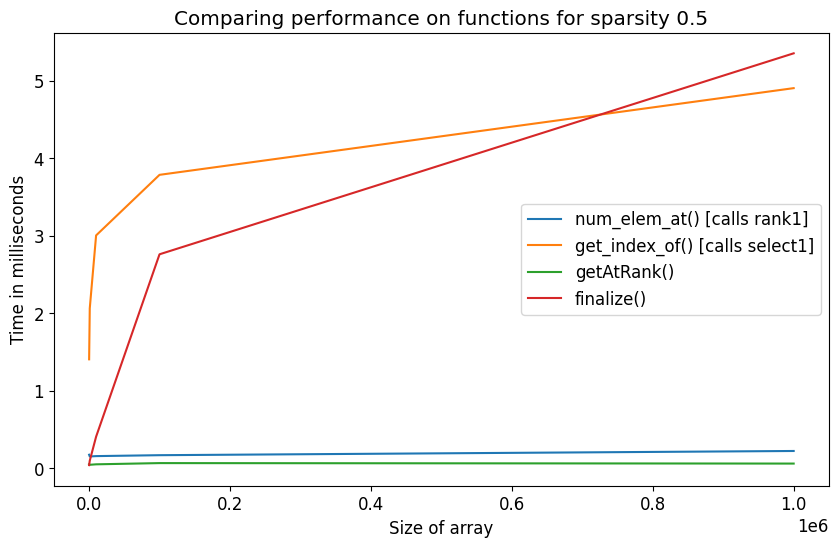

In [72]:
for sparsity in [0.01, 0.05, 0.10, 0.5]: 
    df_temp = df2.loc[df.sparsity == sparsity]
    x = df_temp.array_size.values
    y1 = df_temp.numElemAt.values/1e6
    y2 = df_temp.getIndexOf.values/1e6
    y3 = df_temp.getAtRank.values/1e6
    #y4 = df_temp.Append.values/1e6
    y5 = df_temp.Finalize.values/1e6
    
    plt.figure(figsize=(10,6))
    plt.plot(x, y1, label='num_elem_at() [calls rank1]')
    plt.plot(x, y2, label='get_index_of() [calls select1]')
    plt.plot(x, y3, label='getAtRank()')
    #plt.plot(x, y4, label="append")
    plt.plot(x, y5, label="finalize()")
    

    # Add legend and axis labels
    plt.legend()
    plt.xlabel('Size of array')
    plt.ylabel('Time in milliseconds')
    plt.title(f"Comparing performance on functions for sparsity {sparsity}")    
    # Show plot
    plt.show()

In [63]:
df.to_csv("outputs_numElemAt_getIndexOf.csv", index_label=False)

In [32]:
df.head(20)

,array_size,sparsity,sparseOverhead,strOverhead,numElemAt,getIndexOf
0,100,0.01,1056,1600,1013875,272166
1,100,0.05,1360,1808,300041,3093709
2,100,0.10,2464,2576,199125,1128375
3,100,0.50,8704,6752,202041,1471709
4,1000,0.01,6368,17088,150750,1402917
5,1000,0.05,10352,19776,147041,1565667
6,1000,0.10,20144,26448,150250,1757417
7,1000,0.50,78128,65520,146625,2030917
8,10000,0.01,47664,170656,166500,2039041
9,10000,0.05,96688,203648,153542,2567042


For this programming task, test your implementation by generating sparse arrays of a few different lengths (e.g. 1000, 10000, 100000, 1000000) and having various sparsity (e.g. 1%, 5%, 10%). How does the speed of the different functions vary as a factor of the overall size? How about as a function of the overall sparsity? Finally, try and estimate how the size of your sparse array in memory compares to what the size would be if all of the 0 elements were instead explicitly stored as “empty” elements (e.g. as empty strings). How much space do you save? How do your savings depend on sparsity?

In [36]:
df.shape

(20, 6)

In [34]:
sparsity = 0.01


df_sparsity_01 = df.loc[df.sparsity == sparsity]

In [35]:
df_sparsity_01

,array_size,sparsity,sparseOverhead,strOverhead,numElemAt,getIndexOf
0,100,0.01,1056,1600,1013875,272166
4,1000,0.01,6368,17088,150750,1402917
8,10000,0.01,47664,170656,166500,2039041
12,100000,0.01,422976,1699872,165666,3214459
16,1000000,0.01,4019360,16987568,162208,4642042


In [53]:
import matplotlib

In [58]:
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams["figure.dpi"] = 100

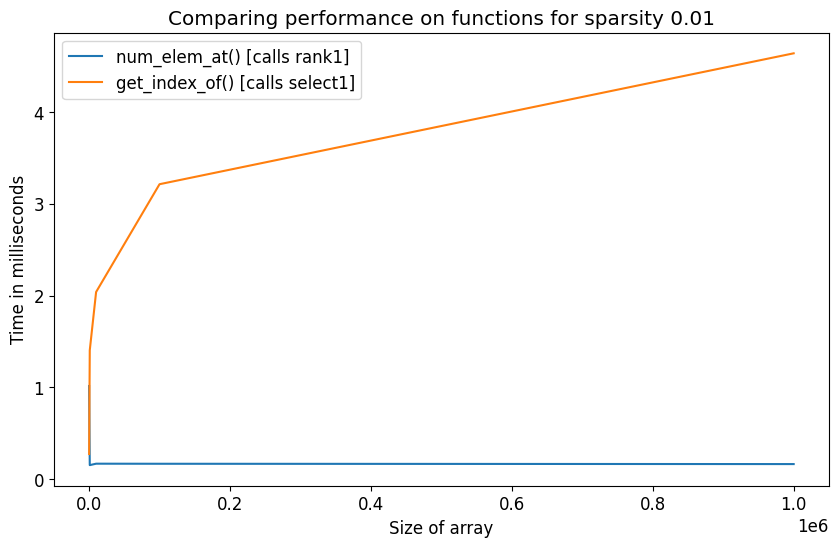

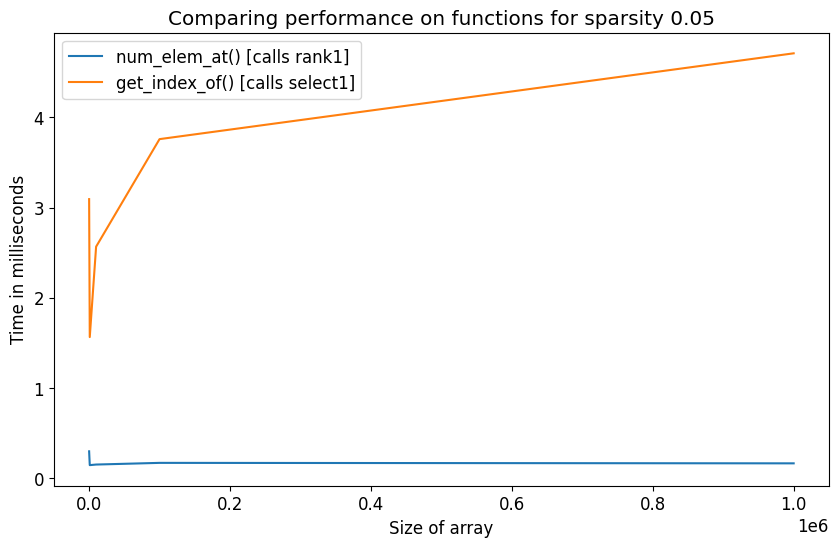

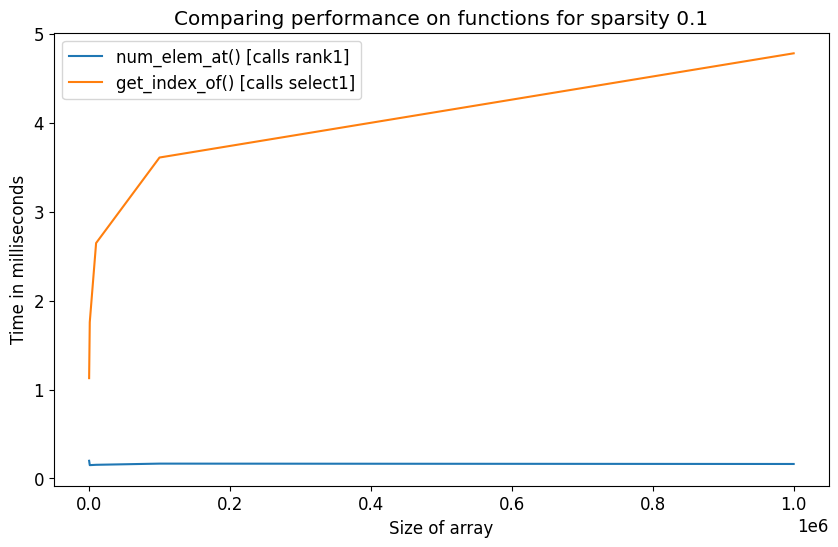

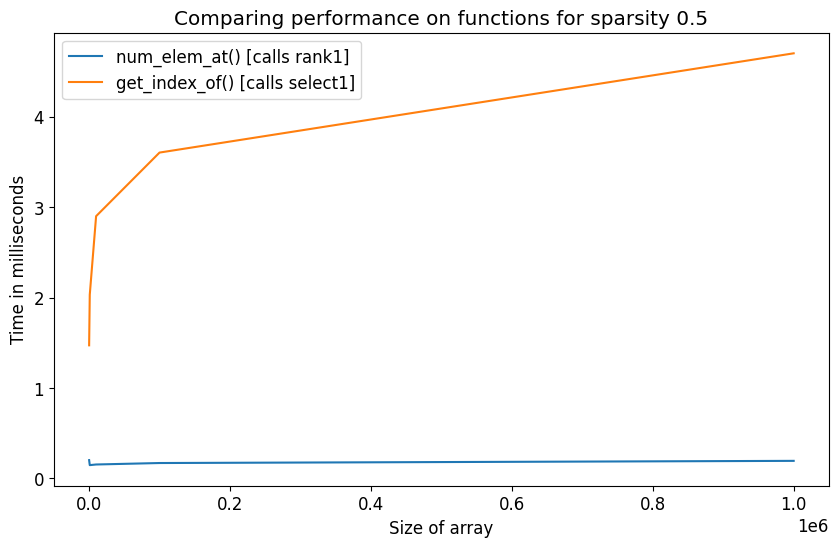

In [60]:
for sparsity in [0.01, 0.05, 0.10, 0.5]: 
    df_temp = df.loc[df.sparsity == sparsity]
    x = df_temp.array_size.values
    y1 = df_temp.numElemAt.values/1e6
    y2 = df_temp.getIndexOf.values/1e6
    
    plt.figure(figsize=(10,6))
    plt.plot(x, y1, label='num_elem_at() [calls rank1]')
    plt.plot(x, y2, label='get_index_of() [calls select1]')

    # Add legend and axis labels
    plt.legend()
    plt.xlabel('Size of array')
    plt.ylabel('Time in milliseconds')
    plt.title(f"Comparing performance on functions for sparsity {sparsity}")    
    # Show plot
    plt.show()